<a href="https://colab.research.google.com/github/bhavya-samboju/2311CS020589/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def calculate_accuracy():
    # Load dataset
    iris = load_iris()
    X, y = iris.data, iris.target

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train Decision Tree model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")

if __name__ == "__main__":
    calculate_accuracy()

Model Accuracy: 1.00


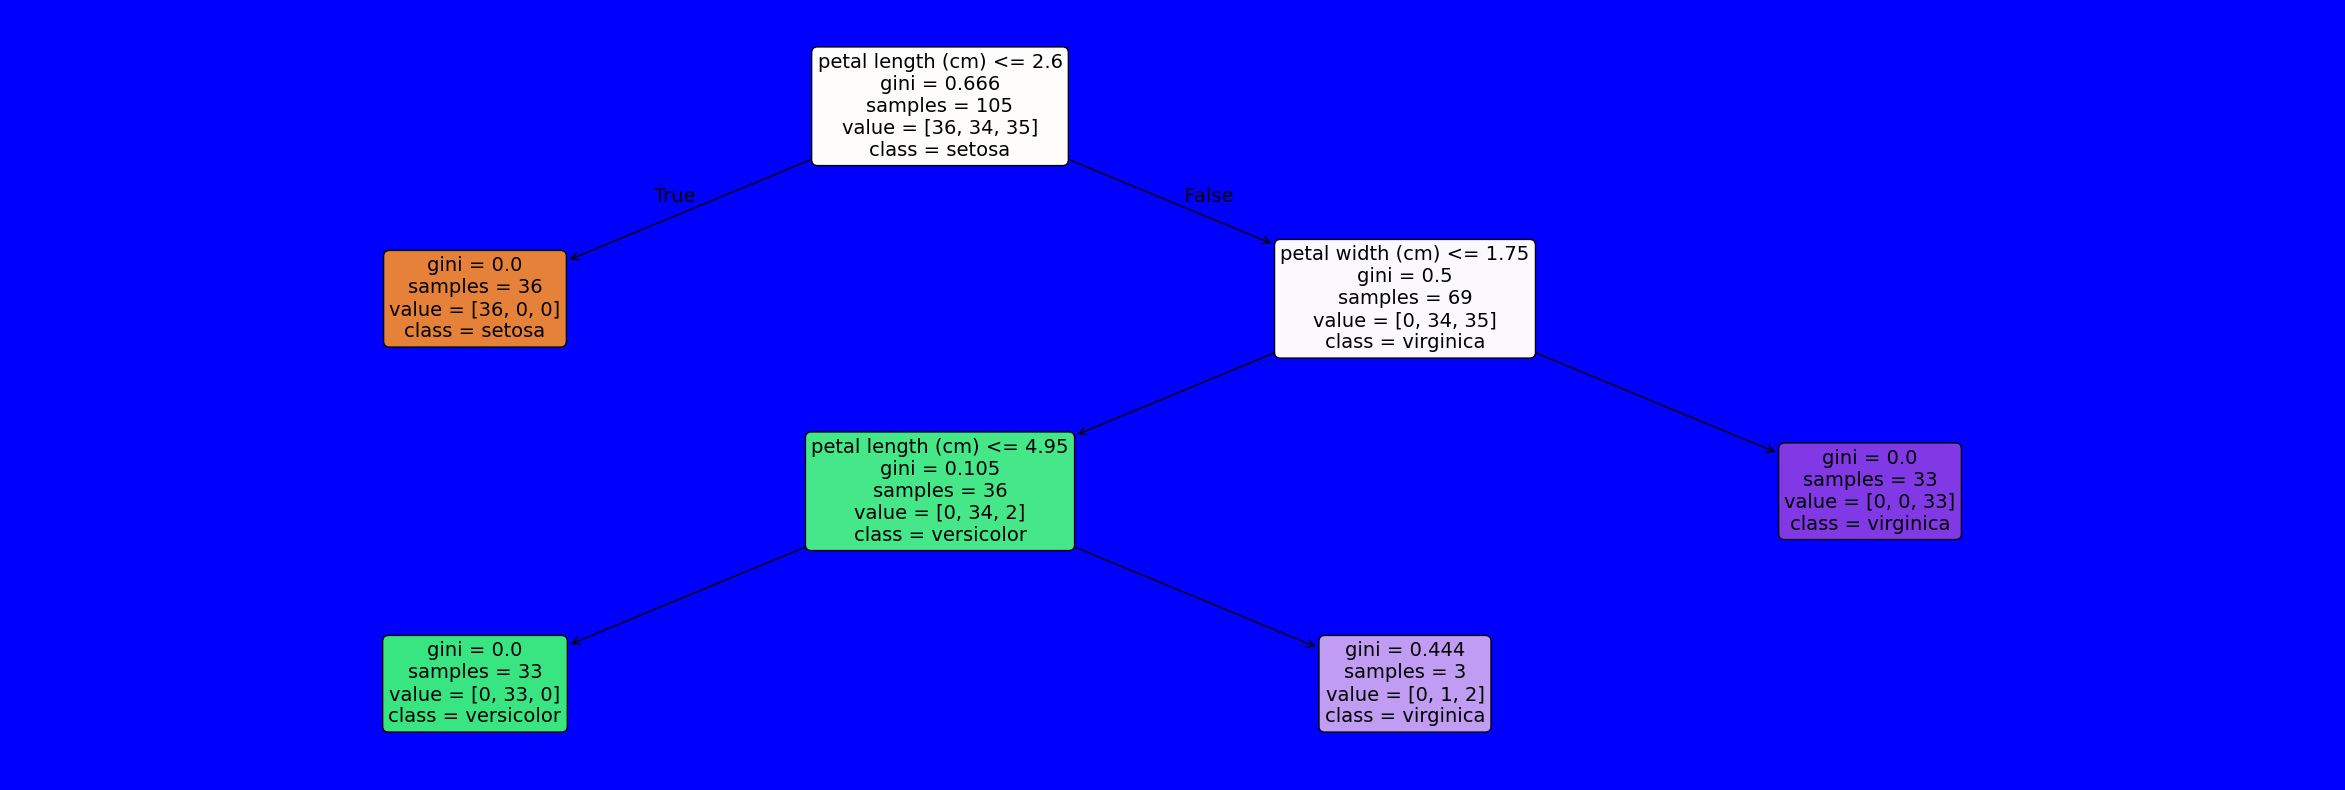

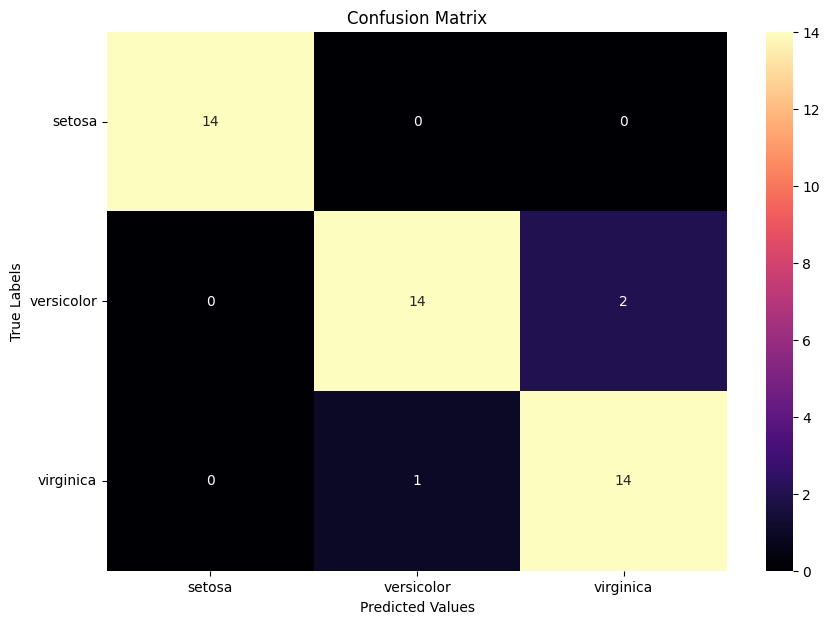

In [6]:
#10.2 exercise
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Loading the dataset
iris = load_iris()

# Converting the data to a pandas DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Creating a separate column for the target variable
data['Species'] = iris.target

# Replacing the categories of target variable with the actual names of the species
target = np.unique(iris.target)
target_n = np.unique(iris.target_names)
target_dict = dict(zip(target, target_n))
data['Species'] = data['Species'].replace(target_dict)

# Separating the independent and dependent variables
x = data.drop(columns="Species")
y = data["Species"]

names_features = x.columns
target_labels = y.unique()

# Splitting the dataset into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=93)

# Creating an instance of the classifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=93)

# Fitting the model
dtc.fit(x_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(30, 10), facecolor='b')
tree.plot_tree(dtc, feature_names=names_features, class_names=target_labels, rounded=True, filled=True, fontsize=14)
plt.show()

# Making predictions
y_pred = dtc.predict(x_test)

# Finding the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(confusion_matrix)

# Plotting heatmap
plt.figure(figsize=(10, 7))
axis = sns.heatmap(matrix, annot=True, fmt="g", cmap="magma")
axis.set_title('Confusion Matrix')
axis.set_xlabel("Predicted Values", fontsize=10)
axis.set_xticklabels(target_labels)
axis.set_ylabel("True Labels", fontsize=10)
axis.set_yticklabels(target_labels, rotation=0)
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris  # Import load_iris

# Load dataset using load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Create DataFrame
data['target'] = iris.target  # Add target column

# Splitting the dataset into training and test sets
training_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

# Classifying the predictors (features) and target (labels)
X_train = training_set.iloc[:, 0:4].values  # Select all 4 features
Y_train = training_set.iloc[:, 4].values  # Select target column
X_test = test_set.iloc[:, 0:4].values  # Select all 4 features
Y_test = test_set.iloc[:, 4].values  # Select target column


# Initializing Support Vector Machine (SVM) and fitting the training data
classifier = SVC(kernel='rbf', random_state=1)
classifier.fit(X_train, Y_train)

# Predicting the classes for the test set
Y_pred = classifier.predict(X_test)

# Adding predictions to test set
test_set = test_set.copy()  # Avoid SettingWithCopyWarning
test_set["Predictions"] = Y_pred

# Computing confusion matrix and accuracy
cm = confusion_matrix(Y_test, Y_pred)
accuracy = float(cm.diagonal().sum()) / len(Y_test)

print("\nAccuracy Of SVM For The Given Dataset:", accuracy)


Accuracy Of SVM For The Given Dataset: 0.9666666666666667


In [9]:
# Importing necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Loading the Iris dataset
iris = datasets.load_iris()

# Displaying basic information
print("\nSpecies labels:", iris.target_names)
print("\nFeature names:", iris.feature_names)
print("\nFirst 5 rows of data:\n", iris.data[0:5])
print("\nIris labels:", iris.target)

# Creating a DataFrame from the Iris dataset
data = pd.DataFrame({
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target
})

# Displaying the first 5 rows of the DataFrame
print("\nDataset preview:\n", data.head())

# Splitting the dataset into features (X) and labels (y)
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

# Splitting the dataset into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Creating and training the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating and displaying accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Making a sample prediction
sample = [[3, 5, 4, 2]]
prediction = clf.predict(sample)
print("\nPrediction for sample", sample, ":", iris.target_names[prediction[0]])

# Displaying feature importance
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_imp)


Species labels: ['setosa' 'versicolor' 'virginica']

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First 5 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Iris labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Dataset preview:
    sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model Accuracy: 0.76


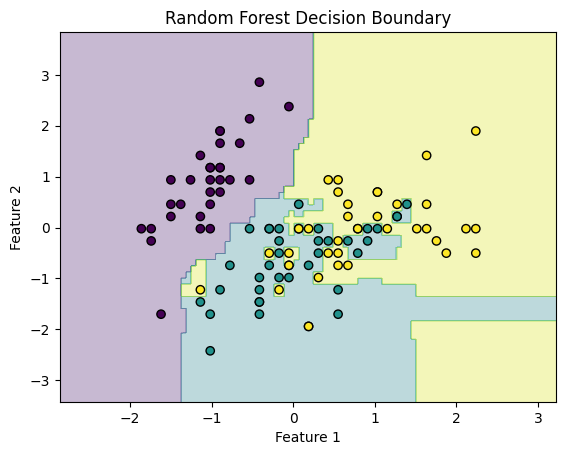

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset as an example)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only first two features for visualization
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Visualizing decision boundary (only works for 2D features)
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Random Forest Decision Boundary')
    plt.show()

plot_decision_boundary(X_train, y_train, rf_model)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Load dataset
data = pd.read_csv("/content/apples_and_oranges (1).csv")


# Convert non-numeric columns to numeric using LabelEncoder (if needed)
encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column])

# Split the dataset into training and test sets
training_set, test_set = train_test_split(data, test_size=0.7, random_state=42)

# Separate features (X) and target (Y)
X_train = training_set.iloc[:, 0:2].values
Y_train = training_set.iloc[:, 2].values
X_test = test_set.iloc[:, 0:2].values
Y_test = test_set.iloc[:, 2].values

# Initialize Support Vector Machine and fit the training data
classifier = SVC(kernel='rbf', random_state=1)
classifier.fit(X_train, Y_train)

# Predict the classes for the test set
Y_pred = classifier.predict(X_test)

# Attach predictions to the test set for comparison
test_set["Predictions"] = Y_pred

# Evaluate the model
cm = confusion_matrix(Y_test, Y_pred)
accuracy = float(cm.diagonal().sum()) / len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset: {:.2f}".format(accuracy))


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xca in position 27: invalid continuation byte

Accuracy of the SVM: 0.95


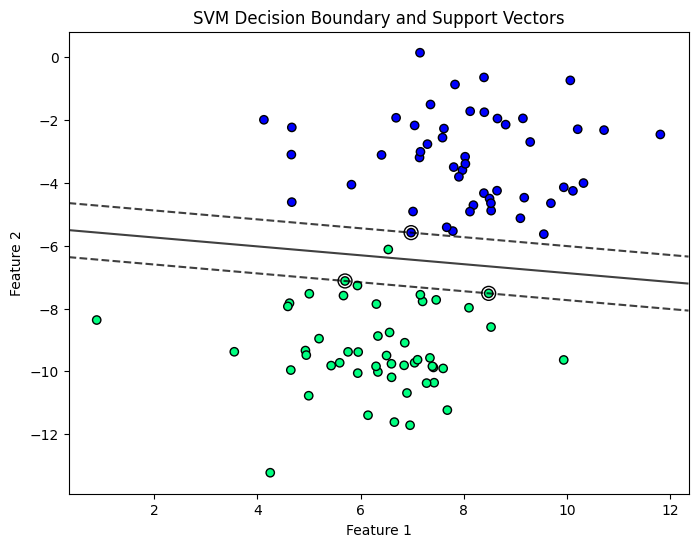

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machine
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM: {:.2f}".format(accuracy))

# Visualization of the SVM Decision Boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid for decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)

# Plot decision boundary
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.75, linestyles=['--', '-', '--'])

# Mark support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title("SVM Decision Boundary and Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Load dataset
data = pd.read_csv('/content/apples_and_oranges (1).csv')
# Convert non-numeric columns to numeric using LabelEncoder (if needed)
encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column])

# Split the dataset into training and test sets
training_set, test_set = train_test_split(data, test_size=0.7, random_state=42)

# Separate features (X) and target (Y)
X_train = training_set.iloc[:, 0:2].values
Y_train = training_set.iloc[:, 2].values
X_test = test_set.iloc[:, 0:2].values
Y_test = test_set.iloc[:, 2].values

# Initialize Support Vector Machine and fit the training data
classifier = SVC(kernel='rbf', random_state=1)
classifier.fit(X_train, Y_train)

# Predict the classes for the test set
Y_pred = classifier.predict(X_test)

# Attach predictions to the test set for comparison
test_set["Predictions"] = Y_pred

# Evaluate the model
cm = confusion_matrix(Y_test, Y_pred)
accuracy = float(cm.diagonal().sum()) / len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset: {:.2f}".format(accuracy))


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xca in position 27: invalid continuation byte